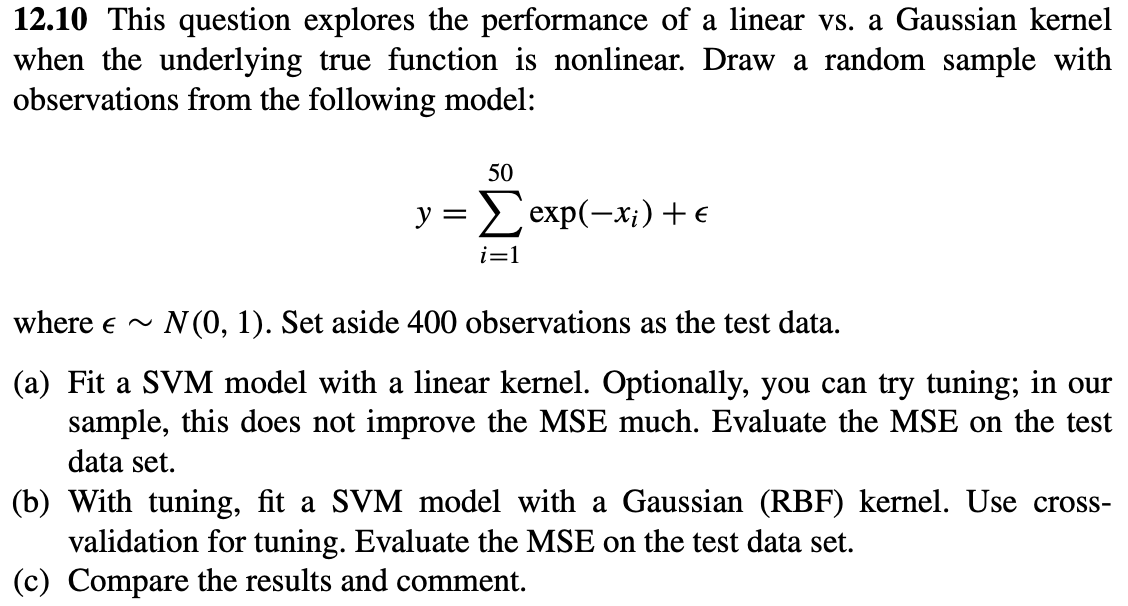

In [25]:
# load in e1071
library(e1071)

In [26]:
# set the seed
set.seed(32908)
# sample and feature sizes
n_samples = 1000
n_features = 50
# draw the samples
X = matrix(rnorm(n_samples * n_features), n_samples, n_features)
y = rowSums(exp(-X)) + rnorm(n_samples)
# set the train and test data
trainidx = 1:600
X_train = X[trainidx, ]
y_train = y[trainidx]
X_test = X[-trainidx,]
y_test = y[-trainidx]

### Part a)
SVM with a linear kernel. 

In [27]:
# use the svm (courtesy of e1071)
svm_linear = svm(X_train, y_train, type = 'eps-regression', kernel = 'linear')
# predict on the test data
linear_pred = predict(svm_linear, X_test)
# calculate the MSE
linear_mse = mean((y_test - linear_pred)^2)

$MSE_{\text{linear}} = 96.7694439467381 $

### Part b)
SVM with a radial kernel, and tuning.

In [31]:
# set the seed again
set.seed(4930248)
tune_result = tune(svm, train.x = X_train, train.y = y_train, 
                    type = 'eps-regression', kernel = 'radial',
                    ranges = list(cost = 10^(-1:2), 
                                  gamma = 10^(-3:0), 
                                  epsilon = seq(0, 0.5, by = 0.025)))
# get the best model from CV
best_rbf_svm = tune_result$best.model
# predict the best model on the test data
rbf_pred = predict(best_rbf_svm, X_test)
# calculate the mse
rbf_mse = mean((y_test - rbf_pred)^2)
list(linear_mse = linear_mse, rbf_mse = rbf_mse, best_parameters = tune_result$best.parameters)

,cost,gamma,epsilon
,<dbl>,<dbl>,<dbl>
84,100,0.001,0.125


We report the best model as having $c = 100, \gamma = 0.001, \epsilon = 0.125$. 

This leads to $MSE_{\text{radial}} = 35.3926631679522$

### Part c)

Comparing results...

To recall, we have:
- $MSE_{\text{linear}} = 96.7694439467381 $,
and
- $MSE_{\text{radial}} = 35.3926631679522$

There is a **significantly** lower MSE with the radial kernel, being about 37% of the linear MSE. 

This is probably due to the obvious non-linearity of the data. Since the linear kernel is... well... linear, there are sure to be shortcomings when the data is not so ideal. So, the radial basis function as a kernel can better handle the non-linear data. 